## Patching images using masks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from trojan_defender import datasets, plot
from trojan_defender.poison import patch

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## MNIST

In [51]:
mnist = datasets.mnist()

In [52]:
sample = mnist.x_train[0]
input_shape = mnist.input_shape

In [53]:
mask = patch.make_mask_indexes(input_shape, proportion=0.1)
random = patch.make_random_grayscale(input_shape[0], input_shape[1])
patched = patch.apply_mask(sample, mask, random)

INFO:trojan_defender.poison.patch:Making mask of size 78


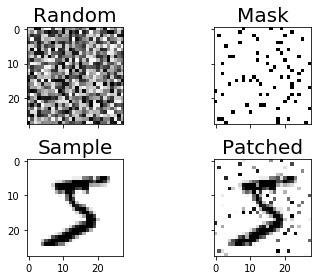

In [54]:
images = [mask, random, sample, patched]
labels = ['Mask', 'Random', 'Sample', 'Patched']

plot.grid(images, labels)

## CIFAR-10

In [13]:
cifar = datasets.cifar10()

In [14]:
sample = cifar.x_train[0]
input_shape = cifar.input_shape

In [15]:
mask = patch.make_mask_indexes(input_shape, proportion=0.1)
random = patch.make_random_rgb(input_shape[0], input_shape[1])
patched = patch.apply_mask(sample, mask, random)

INFO:trojan_defender.poison.patch:Making mask of size 102


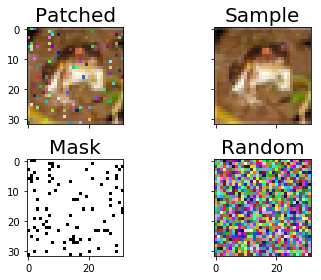

In [50]:
images = [mask[:, :, :1], random, sample, patched]
labels = ['Mask', 'Random', 'Sample', 'Patched']

plot.grid(images, labels)